# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

diretorio_atual = os.getcwd()
df = pd.read_csv(f'{diretorio_atual}/DNOPEN24.csv', sep=';')

/tmp/ipykernel_10188/390554750.py:7: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{diretorio_atual}/DNOPEN24.csv', sep=';')


####  2) Monte gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

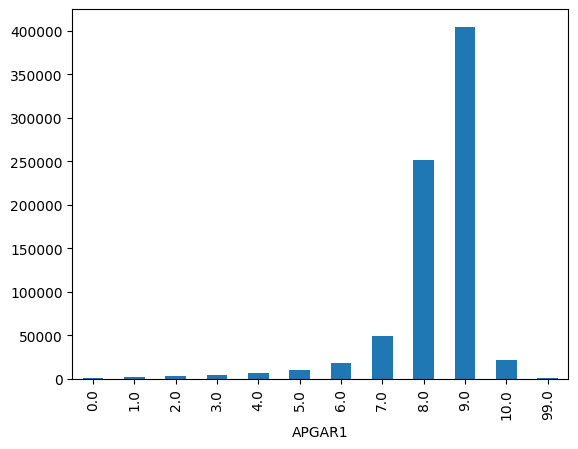

In [3]:
df['APGAR1'].value_counts().sort_index().plot.bar();

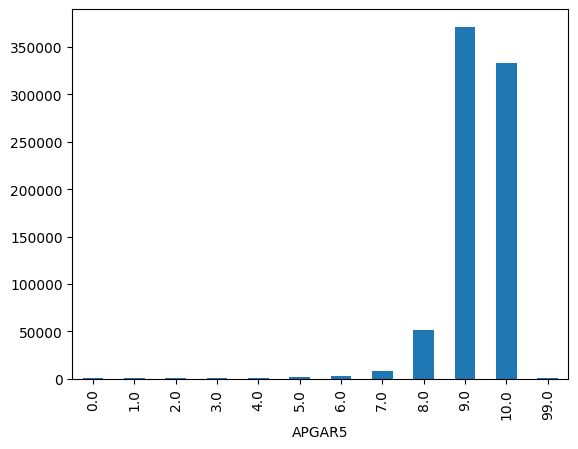

In [5]:
df['APGAR5'].value_counts().sort_index().plot.bar();

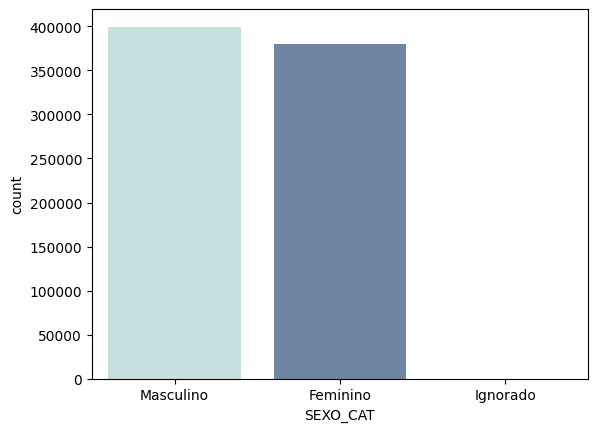

In [7]:
df['SEXO_CAT'] = df.SEXO.map({0: 'Ignorado', 1: 'Masculino', 2: 'Feminino'}) 
sns.countplot(x='SEXO_CAT', data=df, palette='ch:start=.2,rot=-.3', hue='SEXO_CAT');

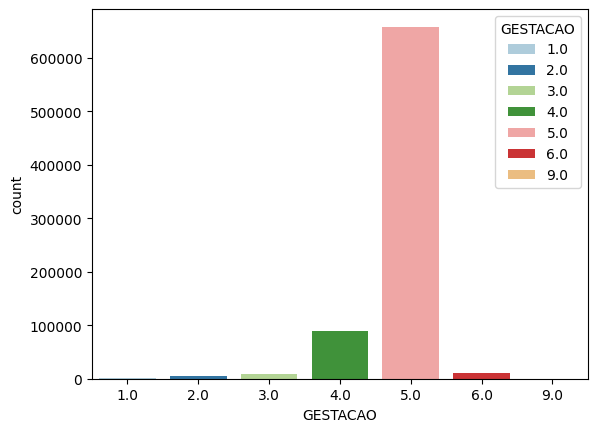

In [9]:
sns.countplot(x='GESTACAO', data=df, palette='Paired', hue='GESTACAO');

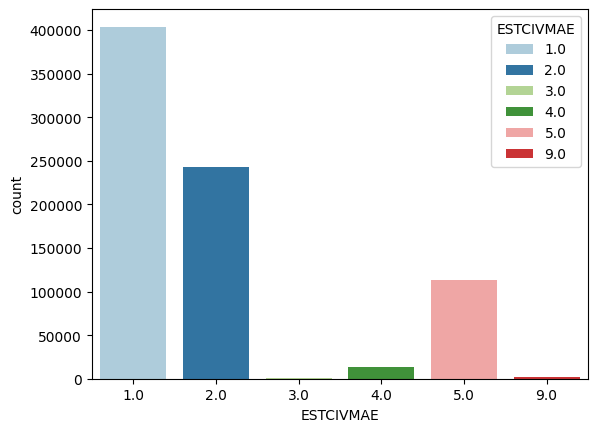

In [11]:
sns.countplot(x='ESTCIVMAE', data=df, palette='Paired', hue='ESTCIVMAE');

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [13]:
df_agrupado = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

In [15]:
df_agrupado

,CONSULTAS,APGAR5
0,1.0,9.439022
1,2.0,9.192198
2,3.0,9.263815
3,4.0,9.361754
4,9.0,10.462642


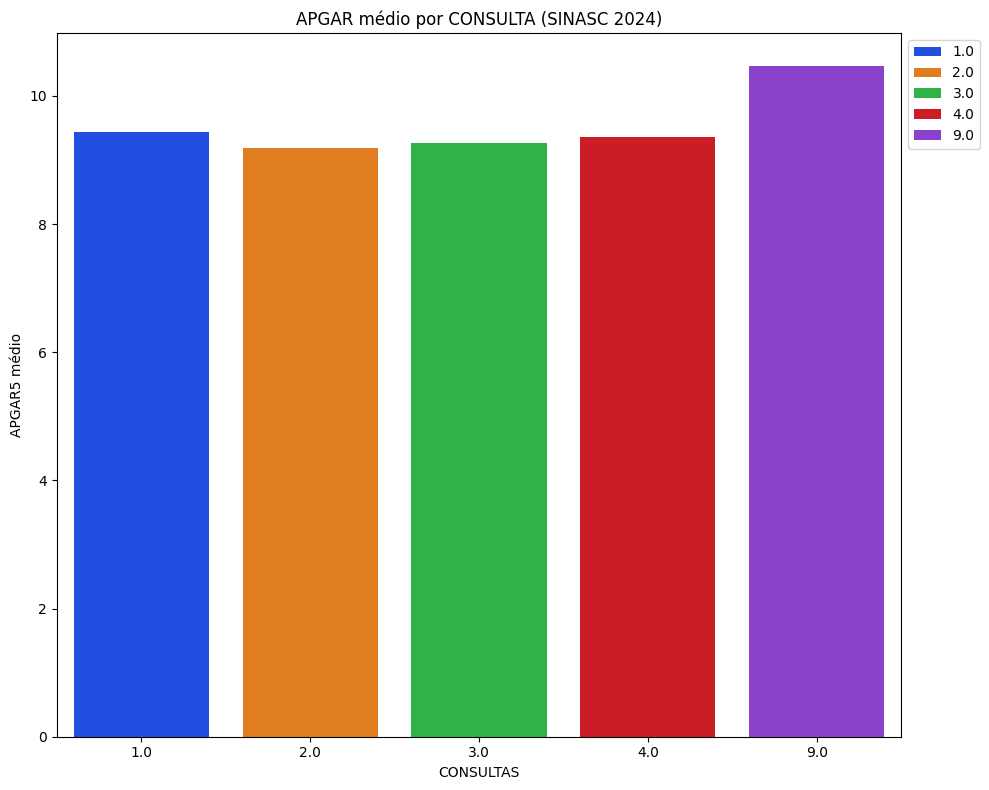

In [43]:
sns.barplot(x='CONSULTAS', y='APGAR5', data=df_agrupado, palette='bright', hue='CONSULTAS', )
plt.title('APGAR médio por CONSULTA (SINASC 2024)')
plt.xlabel('CONSULTAS')
plt.ylabel('APGAR5 médio')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

/tmp/ipykernel_10188/1130553081.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_10188/1130553081.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bx.set_xticklabels(bx.get_xticklabels(), rotation=45)


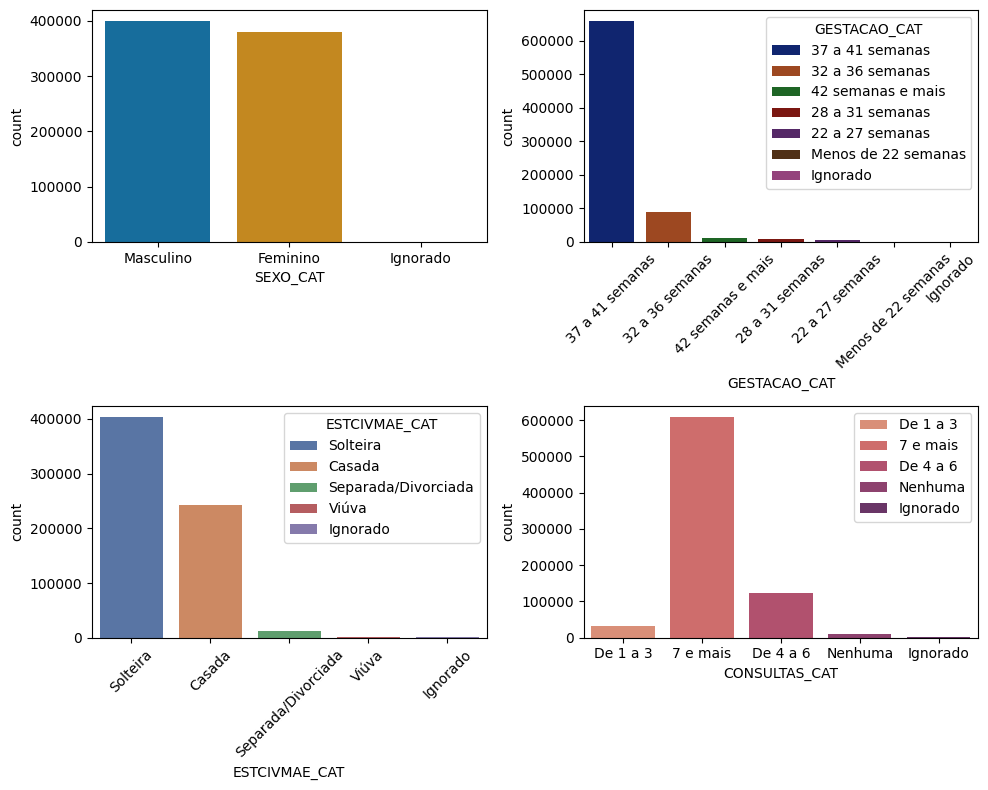

In [79]:
# DESENHO DOS EIXOS DOS 4 GRÁFICOS
plt.close('all')
plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots(2,2)

# DEFINIÇÃO DE VARIÁVEIS
df['SEXO_CAT'] = df.SEXO.map({0: 'Ignorado', 1: 'Masculino', 2: 'Feminino'})
df['GESTACAO_CAT'] = df.GESTACAO.map({1: 'Menos de 22 semanas', 2: '22 a 27 semanas', 3: '28 a 31 semanas', 4: '32 a 36 semanas', 5: '37 a 41 semanas', 6: '42 semanas e mais', 9: 'Ignorado'})
df['ESTCIVMAE_CAT'] = df.ESTCIVMAE.map({1: 'Solteira', 2: 'Casada', 3: 'Viúva', 4: 'Separada/Divorciada', 9: 'Ignorado'})
df['CONSULTAS_CAT'] = df.CONSULTAS.map({1: 'Nenhuma', 2: 'De 1 a 3', 3: 'De 4 a 6', 4: '7 e mais', 9: 'Ignorado'})

# PLOTAGEM DOS GRÁFICOS
sns.countplot(ax = axes[0,0], x='SEXO_CAT', data=df, hue='SEXO_CAT', palette='colorblind')
ax = sns.countplot(ax = axes[0,1], x='GESTACAO_CAT', data=df, hue='GESTACAO_CAT', palette='dark')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
bx = sns.countplot(ax = axes[1,0], x='ESTCIVMAE_CAT', data=df, hue='ESTCIVMAE_CAT', palette='deep')
bx.set_xticklabels(bx.get_xticklabels(), rotation=45)
sns.countplot(ax = axes[1,1], x='CONSULTAS_CAT', data=df, hue='CONSULTAS_CAT', palette='flare')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()